## 1. DATA

#### Data used for this project was obtained from the below websites. Two datasets are included, one provides the half hourly Load Demand in MegaWatts (MW) for Dublin, Ireland, over a period of two years, 2018 to 2020, and the other provides the daily weather data over the same period.

https://transparency.entsoe.eu/

https://www.met.ie/climate/available-data/historical-data

#### Reference for Load Demand Forecasting:

Electrical Power Distribution Engineering, Turan Gonen, 3rd Edition, 2014.

In [1]:
# Import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 2. IMPORTING DATA

#### Both Datasets are .csv files. Number of columns and rows shown below.

In [2]:
# Import Load Demand Data as Pandas DataFrame

Demand = pd.read_csv('Demand.csv', sep=',')
print(Demand)

# Check Lenght

len(Demand)

                           Start                        End   Demand (MW)
0      2017-06-22 11:30:00+00:00  2017-06-22 11:30:00+00:00          3507
1      2017-06-22 12:00:00+00:00  2017-06-22 12:00:00+00:00          3523
2      2017-06-22 12:30:00+00:00  2017-06-22 12:30:00+00:00          3535
3      2017-06-22 13:00:00+00:00  2017-06-22 13:00:00+00:00          3475
4      2017-06-22 13:30:00+00:00  2017-06-22 13:30:00+00:00          3480
...                          ...                        ...           ...
54233  2020-07-28 10:00:00+00:00  2020-07-28 10:00:00+00:00          3587
54234  2020-07-28 10:30:00+00:00  2020-07-28 10:30:00+00:00          3600
54235  2020-07-28 11:00:00+00:00  2020-07-28 11:00:00+00:00          3551
54236  2020-07-28 11:30:00+00:00  2020-07-28 11:30:00+00:00          3595
54237  2020-07-28 12:00:00+00:00  2020-07-28 12:00:00+00:00          3624

[54238 rows x 3 columns]


54238

In [3]:
# Import Weather Data as Pandas DataFrame, with first coulmn as row index

Weather = pd.read_csv('Weather.csv')
print(Weather)

# Check Lenght

len(Weather)

     Station Name: PHOENIX PARK Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0         Station Height: 48 M         NaN        NaN        NaN        NaN
1             Latitude:53.364          NaN        NaN        NaN        NaN
2                           NaN        NaN        NaN        NaN        NaN
3                           NaN        NaN        NaN        NaN        NaN
4        date:  -  00 to 00 utc        NaN        NaN        NaN        NaN
...                         ...        ...        ...        ...        ...
1102                  27-Dec-20        6.2        1.2        4.1      3.999
1103                  28-Dec-20        5.3        2.7        1.2      3.757
1104                  29-Dec-20        5.8        1.1        0.3      3.003
1105                  30-Dec-20        2.8       -1.5          0       2.03
1106                  31-Dec-20        4.7       -1.7        1.7       1.46

[1107 rows x 5 columns]


1107

## 3. DEMAND DATA PREPARATION

In [4]:
# Check Data Types

Demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54238 entries, 0 to 54237
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Start         54238 non-null  object
 1    End          54238 non-null  object
 2    Demand (MW)  54238 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
# Change 'Start' from a string to datetime

Demand['Start'] = pd.to_datetime(Demand['Start'])
Demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54238 entries, 0 to 54237
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Start         54238 non-null  datetime64[ns, UTC]
 1    End          54238 non-null  object             
 2    Demand (MW)  54238 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 1.2+ MB


In [6]:
# Rename Columns

Demand.columns = ['Date', 'Date End', 'Demand (MW)']
Demand.head()

,Date,Date End,Demand (MW)
0,2017-06-22 11:30:00+00:00,2017-06-22 11:30:00+00:00,3507
1,2017-06-22 12:00:00+00:00,2017-06-22 12:00:00+00:00,3523
2,2017-06-22 12:30:00+00:00,2017-06-22 12:30:00+00:00,3535
3,2017-06-22 13:00:00+00:00,2017-06-22 13:00:00+00:00,3475
4,2017-06-22 13:30:00+00:00,2017-06-22 13:30:00+00:00,3480


In [7]:
# Remove the 'Date End' Column as its not required

Demand = Demand.drop('Date End', axis=1)
Demand.head()

,Date,Demand (MW)
0,2017-06-22 11:30:00+00:00,3507
1,2017-06-22 12:00:00+00:00,3523
2,2017-06-22 12:30:00+00:00,3535
3,2017-06-22 13:00:00+00:00,3475
4,2017-06-22 13:30:00+00:00,3480


In [8]:
# Drop rows from 2017

Demand = Demand.drop(Demand.index[range(9200)])
print(Demand)

                           Date  Demand (MW)
9200  2018-01-01 01:30:00+00:00         2877
9201  2018-01-01 02:00:00+00:00         2781
9202  2018-01-01 02:30:00+00:00         2673
9203  2018-01-01 03:00:00+00:00         2595
9204  2018-01-01 03:30:00+00:00         2526
...                         ...          ...
54233 2020-07-28 10:00:00+00:00         3587
54234 2020-07-28 10:30:00+00:00         3600
54235 2020-07-28 11:00:00+00:00         3551
54236 2020-07-28 11:30:00+00:00         3595
54237 2020-07-28 12:00:00+00:00         3624

[45038 rows x 2 columns]


In [9]:
# Remove Timestamp

Demand['Date'] = Demand['Date'].dt.date
Demand.head()

,Date,Demand (MW)
9200,2018-01-01,2877
9201,2018-01-01,2781
9202,2018-01-01,2673
9203,2018-01-01,2595
9204,2018-01-01,2526


In [10]:
# Change 'Date' to datetime type

Demand['Date'] = pd.to_datetime(Demand['Date'])
Demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45038 entries, 9200 to 54237
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         45038 non-null  datetime64[ns]
 1   Demand (MW)  45038 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 703.8 KB


In [11]:
# Add column for Pandemic. Offical start date of the Pandemic in Ireland 08/03/20

Demand['Pandemic'] = ['Yes' if x > datetime(2020, 3, 8) 
                      else 'No' 
                      for x in Demand['Date']]
print(Demand)

            Date  Demand (MW) Pandemic
9200  2018-01-01         2877       No
9201  2018-01-01         2781       No
9202  2018-01-01         2673       No
9203  2018-01-01         2595       No
9204  2018-01-01         2526       No
...          ...          ...      ...
54233 2020-07-28         3587      Yes
54234 2020-07-28         3600      Yes
54235 2020-07-28         3551      Yes
54236 2020-07-28         3595      Yes
54237 2020-07-28         3624      Yes

[45038 rows x 3 columns]


In [12]:
# Set 'Date' as index and resample for monthly max demand output. Load forecast based on max demands.
# Data set includes 31 months.

Demand = Demand.set_index('Date')

In [13]:
Demand.resample('M').max().head(31)

,Demand (MW),Pandemic
Date,,
2018-01-31,4864,No
2018-02-28,4815,No
2018-03-31,4720,No
2018-04-30,4244,No
2018-05-31,3996,No
2018-06-30,3821,No
2018-07-31,3765,No
2018-08-31,3841,No
2018-09-30,4105,No


In [14]:
# Create new dataframe from reasmpled data

Demand_resampled_max = Demand.resample('M').max().head(31)

## 4. WEATHER DATA PREPERATION

In [15]:
Weather.head(15)

,Station Name: PHOENIX PARK,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Station Height: 48 M,NaN,NaN,NaN,NaN
1,Latitude:53.364,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,date: - 00 to 00 utc,NaN,NaN,NaN,NaN
5,rain: - Precipitation Amount (mm),NaN,NaN,NaN,NaN
6,maxtp: - Maximum Air Temperature (C)\t,NaN,NaN,NaN,NaN
7,mintp: - Minimum Air Temperature (C),NaN,NaN,NaN,NaN
8,soil: - Mean 10cm soil temperature (C),NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [16]:
# Remove first 11 rows and soil temp column, these are not required, and rename columns

Weather = Weather.drop(Weather.index[range(11)])
Weather = Weather.drop(Weather.columns[[4]], axis=1)
Weather.columns = ['Date', 'Max Temp C', 'Min Temp C', 'Rainfall mm']
Weather.head(15)

,Date,Max Temp C,Min Temp C,Rainfall mm
11,01-Jan-18,8.2,3.5,0.4
12,02-Jan-18,11,3.7,6.2
13,03-Jan-18,8.3,4.7,2.8
14,04-Jan-18,9.6,3.4,9.4
15,05-Jan-18,6.7,0.3,0
16,06-Jan-18,6.7,-0.4,0
17,07-Jan-18,6.7,0.5,0
18,08-Jan-18,6,-3.1,0
19,09-Jan-18,8.2,4,0.9
20,10-Jan-18,7.3,0.7,0.1


In [17]:
# Check data types

Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 11 to 1106
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1096 non-null   object
 1   Max Temp C   1096 non-null   object
 2   Min Temp C   1096 non-null   object
 3   Rainfall mm  1096 non-null   object
dtypes: object(4)
memory usage: 34.4+ KB


In [18]:
# Change 'Date' to datetime, and other columns to floats

Weather['Date'] = pd.to_datetime(Weather['Date'])
Weather['Max Temp C'] = pd.to_numeric(Weather['Max Temp C'])
Weather['Min Temp C'] = pd.to_numeric(Weather['Min Temp C'])
Weather['Rainfall mm'] = pd.to_numeric(Weather['Rainfall mm'])
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 11 to 1106
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1096 non-null   datetime64[ns]
 1   Max Temp C   1096 non-null   float64       
 2   Min Temp C   1096 non-null   float64       
 3   Rainfall mm  1096 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.4 KB


In [19]:
Weather = Weather.set_index('Date')

In [20]:
# Resample Weather data to give monthly temps
# Create new dataframe from reasmpled data

Weather.resample('M').max().head(31)

,Max Temp C,Min Temp C,Rainfall mm
Date,,,
2018-01-31,13.3,9.2,17.9
2018-02-28,12.7,5.3,9.4
2018-03-31,13.4,7.3,20.3
2018-04-30,20.0,11.1,19.2
2018-05-31,23.0,12.7,10.0
2018-06-30,27.9,13.4,2.3
2018-07-31,27.7,15.9,9.0
2018-08-31,26.2,17.1,12.5
2018-09-30,25.1,13.9,14.9


In [21]:
Weather_resampled_max = Weather.resample('M').max().head(31)

In [22]:
# Merge dataframes using the date as the key

Demand.merge(Weather, left_on='Date', right_on='Date')

,Demand (MW),Pandemic,Max Temp C,Min Temp C,Rainfall mm
Date,,,,,
2018-01-01,2877,No,8.2,3.5,0.4
2018-01-01,2781,No,8.2,3.5,0.4
2018-01-01,2673,No,8.2,3.5,0.4
2018-01-01,2595,No,8.2,3.5,0.4
2018-01-01,2526,No,8.2,3.5,0.4
...,...,...,...,...,...
2020-07-28,3587,Yes,18.1,9.9,0.0
2020-07-28,3600,Yes,18.1,9.9,0.0
2020-07-28,3551,Yes,18.1,9.9,0.0


## 5. ANALYSIS

In [23]:
# Note how the plots contrast, the peak of the demand plot is opposite the trough of the weather plot, and vice versa

<AxesSubplot:xlabel='Date'>

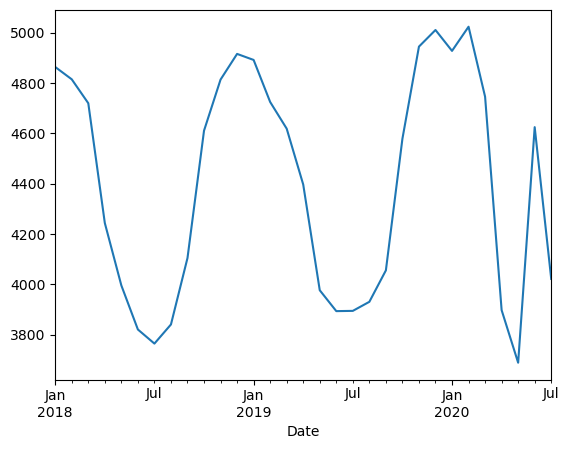

In [24]:
Demand_resampled_max['Demand (MW)'].plot()

<AxesSubplot:xlabel='Date'>

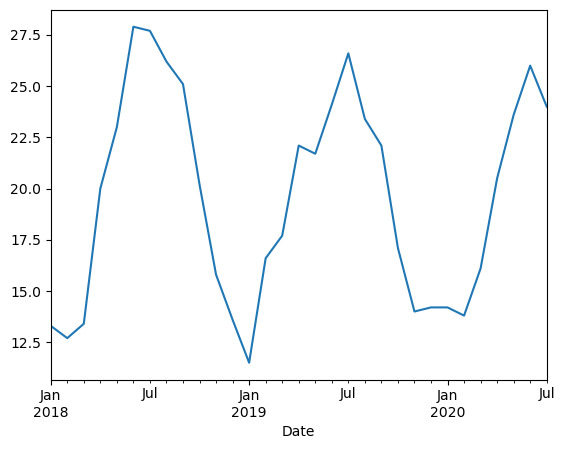

In [25]:
Weather_resampled_max['Max Temp C'].plot()

In [26]:
Demand.describe()

,Demand (MW)
count,45038.000000
mean,3301.229184
std,611.239929
min,2010.000000
25%,2790.000000
50%,3346.000000
75%,3739.000000
max,5024.000000


In [27]:
Weather.describe()

,Max Temp C,Min Temp C,Rainfall mm
count,1096.000000,1096.000000,1096.000000
mean,14.254380,6.439142,2.059398
std,5.274823,4.438508,3.866090
min,0.200000,-4.600000,0.000000
25%,10.200000,3.100000,0.000000
50%,13.900000,6.200000,0.300000
75%,18.425000,9.900000,2.400000
max,27.900000,18.300000,36.700000


In [28]:
# In general, as per the plots the higher demand is in Winter and lower Demand is in Summer
# Reset index so Panda's see 'Date' as a column

Demand = Demand.reset_index()

In [29]:
Weather = Weather.reset_index()

In [30]:
# For demand forcasting we will use the max demand from each year 2018, 2019, 2020

Demand.sort_values('Demand (MW)', ascending=False).head(15)

,Date,Demand (MW),Pandemic
37002,2020-02-11,5024,No
37003,2020-02-11,5013,No
34313,2019-12-17,5011,No
36954,2020-02-10,4991,No
33593,2019-12-02,4986,No
34314,2019-12-17,4978,No
36955,2020-02-10,4953,No
34312,2019-12-17,4950,No
34265,2019-12-16,4947,No
32681,2019-11-13,4945,No


In [31]:
# Min demands all recorded during pandemic

Demand.sort_values('Demand (MW)', ascending=True).head(15)

,Date,Demand (MW),Pandemic
42249,2020-05-31,2010,Yes
42250,2020-05-31,2031,Yes
42248,2020-05-31,2038,Yes
43583,2020-06-28,2040,Yes
43584,2020-06-28,2040,Yes
10071,2018-07-30,2043,No
10072,2018-07-30,2045,No
10070,2018-07-30,2046,No
27867,2019-08-05,2055,No
42586,2020-06-07,2060,Yes


In [32]:
# Max demand for 2018, 2019 & 2020

Demand.loc[[37002,34313,16189]]

,Date,Demand (MW),Pandemic
37002,2020-02-11,5024,No
34313,2019-12-17,5011,No
16189,2018-12-04,4916,No


In [33]:
# Create new dataframe for max demand to use for analysis

Max_Demand = Demand.loc[[37002,34313,16189]]

In [34]:
print(Max_Demand)

            Date  Demand (MW) Pandemic
37002 2020-02-11         5024       No
34313 2019-12-17         5011       No
16189 2018-12-04         4916       No


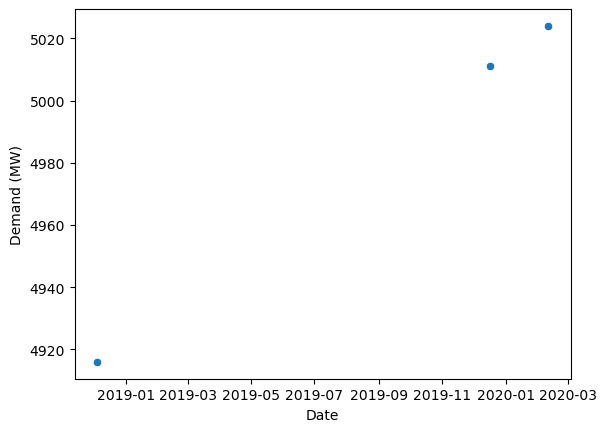

In [35]:
sns.scatterplot(data=Max_Demand, x='Date', y='Demand (MW)')
plt.show()

In [36]:
# Date changed to numeric for trend line to work

Max_Demand['Date'] = pd.to_numeric(Max_Demand['Date'])

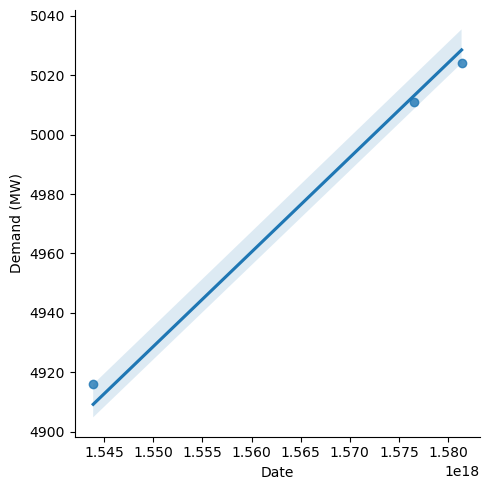

In [37]:
sns.lmplot(data=Max_Demand, x='Date', y='Demand (MW)')
plt.show()

In [38]:
# From the above graph we can say the load increases at a constant perctenge rate
# The equation to calculate the increase per year is (1+g)^n = x
# Where; g = growth rate, n = years, x = % rate ie. (2018 max demand / 2020 max demand)

In [39]:
x = (5024 / 4916)
round(x, 4)

1.022

In [40]:
g = np.cbrt(1.022) - 1
round(g, 4)

0.0073

In [41]:
# Growth rate is 0.73% per year

In [42]:
# Growth equation is Pn = Po(1+g)^n
# Where; Pn = the load at the nth year, Po = initial load (5024), g = growth rate (0.0073), n = years

In [43]:
# Test from 2018 - 2020 gives correct result

Pn = 4916*(1 + 0.0073)**3
round(Pn)

5024

In [44]:
# g and Po are constants

Po = 5024
g = 0.0073

In [45]:
# Create demand forecast function

def Demand_Forecast(num):
    demand_list = []
    for years in range(num):
        Pn = Po*(1+g)**(years)
        result = round(Pn)
        demand_list.append(result)
    print(demand_list)

In [46]:
Demand_Forecast(6)

[5024, 5061, 5098, 5135, 5172, 5210]


In [47]:
# Create new dataframe using list of results and corresponding years

model_year = [2020,2021,2022,2023,2024,2025,2026]
model_demand = [5024, 5061, 5098, 5135, 5172, 5210]
zipped = list(zip(model_year, model_demand))

In [48]:
Model = pd.DataFrame(zipped, columns=['Year', 'Demand'])
Model.head(6)

,Year,Demand
0,2020,5024
1,2021,5061
2,2022,5098
3,2023,5135
4,2024,5172
5,2025,5210


<AxesSubplot:xlabel='Year'>

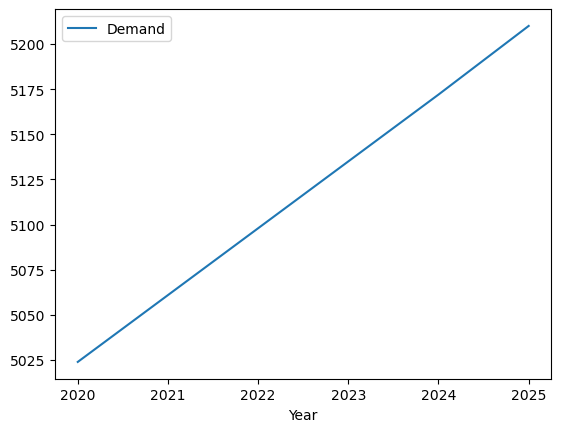

In [49]:
# Plot demand forecast

Model.plot(x='Year', y='Demand')